In [20]:
import os
import pandas as pd
from scipy.stats import pearsonr
import scipy.stats as stats
os.chdir('../scripts')
import utils
import plot

In [21]:
print(os.getcwd())


/home/musse/Documents/Tenx/kaim-week-1/scripts


In [22]:
#load sentiment data
sentiment_data_path = '../data/sentiment _analysis/sentiment_analysis_results.csv'
sentiment_df = pd.read_csv(sentiment_data_path)

In [23]:
sentiment_df.head()

,headline,url,publisher,date,stock,sentiment
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,neutral
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,neutral
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,neutral
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,neutral
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,positive


In [24]:
#load stock data
stock_data_path = '../data/finance_data/stock_data_extracted.csv'
stock_df = pd.read_csv(stock_data_path)


In [25]:
stock_df.head()

,Date,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Adj Close,AAPL_Volume,AAPL_Dividends,AAPL_Stock Splits,GOOG_Open,...,TSLA_Dividends,TSLA_Stock Splits,NVDA_Open,NVDA_High,NVDA_Low,NVDA_Close,NVDA_Adj Close,NVDA_Volume,NVDA_Dividends,NVDA_Stock Splits
0,2012-12-12,19.563213,19.571428,19.152500,19.250000,16.400513,487144000,0.0,0.0,17.415474,...,0.0,0.0,0.31725,0.31900,0.31175,0.31300,0.288944,399404000,0.0,0.0
1,2012-12-13,18.969643,19.201429,18.778570,18.917500,16.117235,625259600,0.0,0.0,17.831163,...,0.0,0.0,0.31250,0.31925,0.31025,0.31325,0.289175,377556000,0.0,0.0
2,2012-12-14,18.383928,18.504642,18.056429,18.206785,15.511719,1009579200,0.0,0.0,17.413979,...,0.0,0.0,0.31450,0.31800,0.31225,0.31475,0.290560,338660000,0.0,0.0
3,2012-12-17,18.176071,18.571428,17.901072,18.529642,15.786786,757607200,0.0,0.0,17.571636,...,0.0,0.0,0.31400,0.31575,0.30875,0.31350,0.289406,445232000,0.0,0.0
4,2012-12-18,18.750000,19.103571,18.580357,19.067858,16.245329,625685200,0.0,0.0,17.848101,...,0.0,0.0,0.31350,0.31750,0.31250,0.31400,0.289867,416436000,0.0,0.0


In [26]:
stock_df.shape

(2926, 57)

Data Alignment

In [27]:
# Convert sentiment_df dates to date only (removing time component)
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

# Convert stock_df dates to date only (ensuring same format)
stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date

# Now find common dates
common_dates = set(sentiment_df['date']).intersection(set(stock_df['Date']))

# Filter datasets to include only common dates
sentiment_df = sentiment_df[sentiment_df['date'].isin(common_dates)]
stock_df = stock_df[stock_df['Date'].isin(common_dates)]

# Check the result
print(f"Number of common dates: {len(common_dates)}")
print("\nFirst few rows of stock_df after alignment:")
print(stock_df.head())

Number of common dates: 1848

First few rows of stock_df after alignment:
         Date  AAPL_Open  AAPL_High   AAPL_Low  AAPL_Close  AAPL_Adj Close  \
0  2012-12-12  19.563213  19.571428  19.152500   19.250000       16.400513   
1  2012-12-13  18.969643  19.201429  18.778570   18.917500       16.117235   
2  2012-12-14  18.383928  18.504642  18.056429   18.206785       15.511719   
3  2012-12-17  18.176071  18.571428  17.901072   18.529642       15.786786   
4  2012-12-18  18.750000  19.103571  18.580357   19.067858       16.245329   

   AAPL_Volume  AAPL_Dividends  AAPL_Stock Splits  GOOG_Open  ...  \
0    487144000             0.0                0.0  17.415474  ...   
1    625259600             0.0                0.0  17.831163  ...   
2   1009579200             0.0                0.0  17.413979  ...   
3    757607200             0.0                0.0  17.571636  ...   
4    625685200             0.0                0.0  17.848101  ...   

   TSLA_Dividends  TSLA_Stock Splits  NVDA


Daily Stock Returns

In [28]:
stock_df['AAPL_Return'] = stock_df['AAPL_Close'].pct_change() * 100
stock_df['AMZN_Return'] = stock_df['AMZN_Close'].pct_change() * 100
stock_df['TSLA_Return'] = stock_df['TSLA_Close'].pct_change() * 100
stock_df['NVDA_Return'] = stock_df['NVDA_Close'].pct_change() * 100
stock_df['GOOG_Return'] = stock_df['GOOG_Close'].pct_change() * 100
stock_df['META_Return'] = stock_df['META_Close'].pct_change() * 100
stock_df['MSFT_Return'] = stock_df['MSFT_Close'].pct_change() * 100

# Display the first few rows to verify the calculation
stock_df[['Date', 'AAPL_Return', 'TSLA_Return', 'NVDA_Return', 'GOOG_Return', 'AMZN_Return', 'META_Return', 'MSFT_Return']]


,Date,AAPL_Return,TSLA_Return,NVDA_Return,GOOG_Return,AMZN_Return,META_Return,MSFT_Return
0,2012-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-12-13,-1.727275,-4.679518,0.079876,0.736860,-0.202576,2.393038,-0.477236
2,2012-12-14,-3.756915,0.595039,0.478845,-0.105318,-0.819898,-5.063740,-1.106607
3,2012-12-17,1.773278,1.745036,-0.397140,2.681072,1.874068,-0.223795,1.081689
4,2012-12-18,2.904620,0.552338,0.159497,0.040235,2.576228,3.588782,1.697414
...,...,...,...,...,...,...,...,...
1882,2020-06-05,2.848099,2.461881,1.750979,1.855997,0.910349,1.979765,2.339820
1883,2020-06-08,0.591249,7.255607,-1.289235,0.571466,1.653646,0.272995,0.619660
1884,2020-06-09,3.157800,-0.973763,2.737072,0.660165,3.042714,3.141748,0.764495
1885,2020-06-10,2.572751,8.970206,3.545769,0.665455,1.791329,-0.812839,3.709164


Daily Stock Returns Comparison

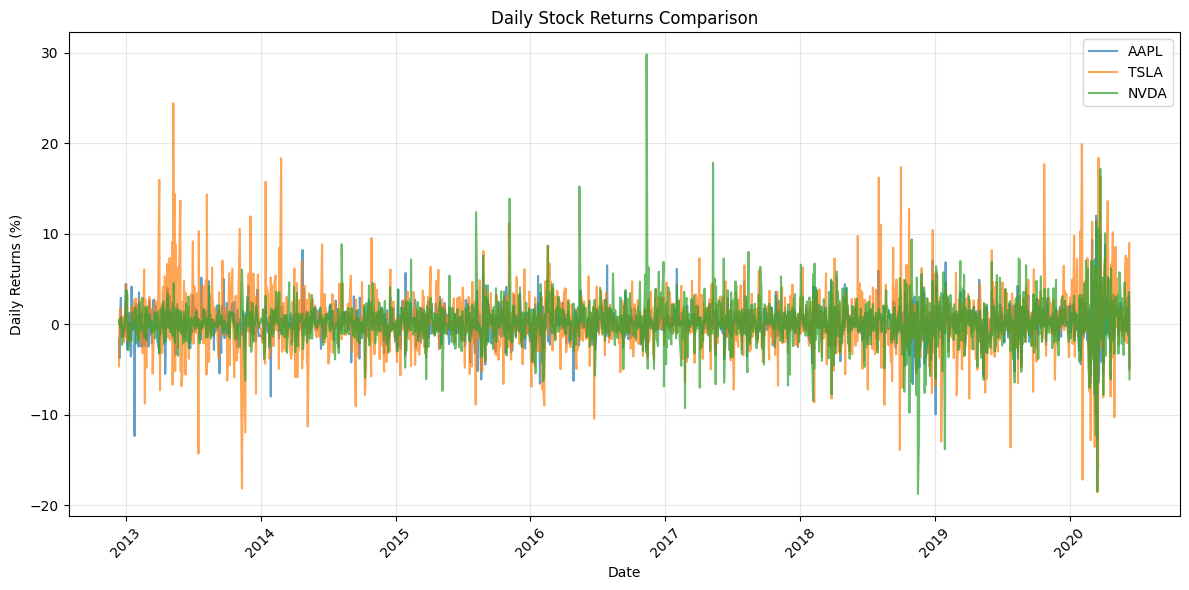

In [29]:
stock_columns = ['AAPL_Return', 'TSLA_Return', 'NVDA_Return',]

plot.plot_stock_returns(stock_df, stock_columns)

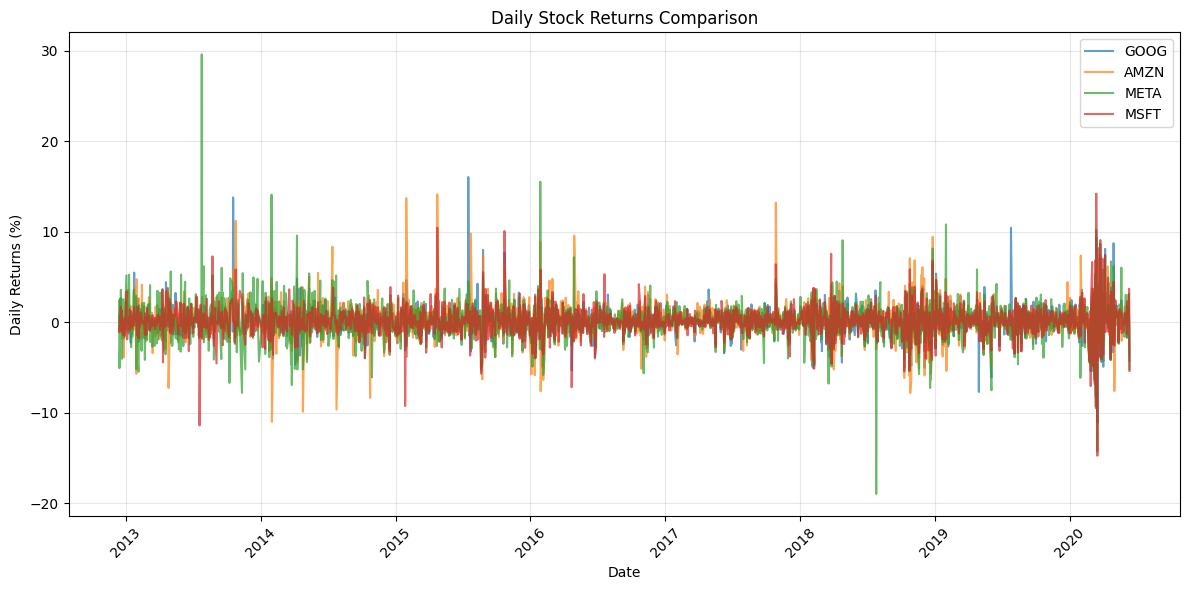

In [30]:
stock_columns = [ 'GOOG_Return', 'AMZN_Return', 'META_Return', 'MSFT_Return']

plot.plot_stock_returns(stock_df, stock_columns)

In [31]:
stock_columns = [ 'GOOG_Return', 'AMZN_Return', 'META_Return', 'MSFT_Return', 'AAPL_Return', 'TSLA_Return', 'NVDA_Return']

Correlation Analysis between sentiment and stock returns

In [32]:
#Convert dates to consistent format
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

In [33]:

# Convert sentiment to numerical scores and aggregate by date
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
daily_sentiment = (sentiment_df
                  .assign(sentiment_score=sentiment_df['sentiment'].map(sentiment_mapping))
                  .groupby('date')['sentiment_score']
                  .mean()
                  .reset_index())

In [34]:

#Merge with proper date alignment
merged_df = pd.merge(daily_sentiment, 
                    stock_df, 
                    left_on='date', 
                    right_on='Date', 
                    how='inner')

In [35]:
# Check for missing values
print("\nMissing values in merged data:")
print(merged_df[['sentiment_score'] + stock_columns].isnull().sum())

#Remove any rows with NaN values
merged_df = merged_df.dropna(subset=['sentiment_score'] + stock_columns)


Missing values in merged data:
sentiment_score    0
GOOG_Return        1
AMZN_Return        1
META_Return        1
MSFT_Return        1
AAPL_Return        1
TSLA_Return        1
NVDA_Return        1
dtype: int64


In [36]:

# Calculate correlations
correlations = {}
for stock in stock_columns:
    correlation, p_value = pearsonr(merged_df['sentiment_score'], merged_df[stock])
    correlations[stock] = {
        'correlation': correlation,
        'p_value': p_value
    }


In [37]:
print("\nCorrelation between daily sentiment scores and stock returns:")
for stock, stats in correlations.items():
    print(f"{stock}:")
    print(f"  Correlation: {stats['correlation']:.4f}")
    print(f"  P-value: {stats['p_value']:.4f}")


Correlation between daily sentiment scores and stock returns:
GOOG_Return:
  Correlation: 0.0255
  P-value: 0.2738
AMZN_Return:
  Correlation: 0.0150
  P-value: 0.5182
META_Return:
  Correlation: 0.0061
  P-value: 0.7935
MSFT_Return:
  Correlation: 0.0474
  P-value: 0.0418
AAPL_Return:
  Correlation: 0.0544
  P-value: 0.0194
TSLA_Return:
  Correlation: -0.0154
  P-value: 0.5084
NVDA_Return:
  Correlation: 0.0419
  P-value: 0.0716


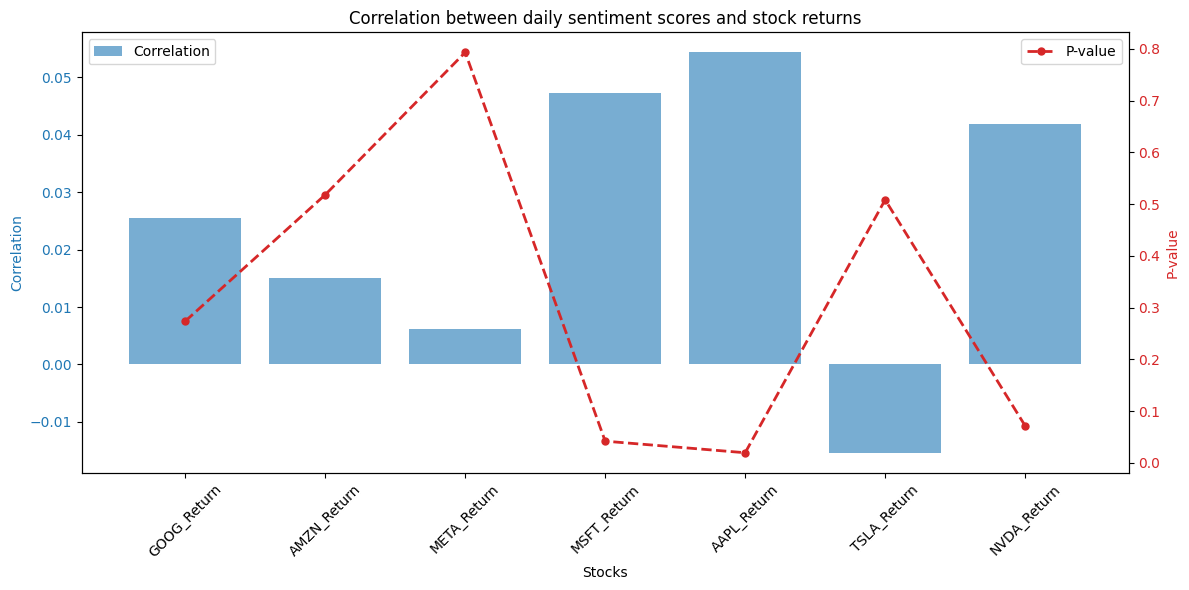

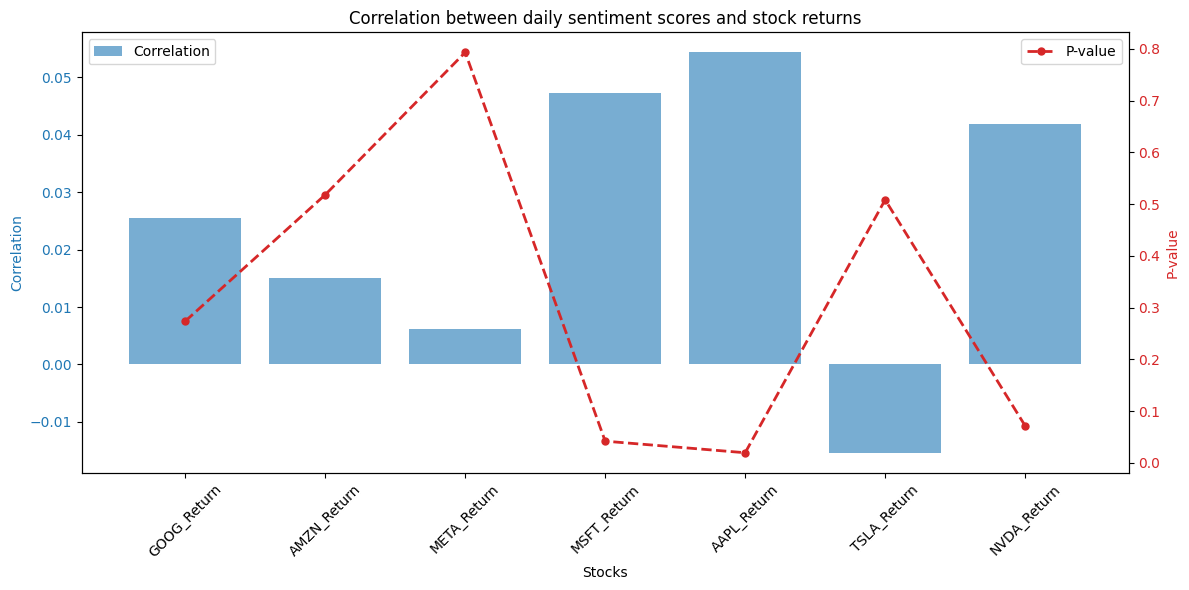

In [39]:
plot.plot_correlation_analysis(correlations, 'Correlation between daily sentiment scores and stock returns')